## Importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate

## Suavização e amostragem

In [3]:
def downsample(img):
    '''Gera uma nova imagem com metade do tamanho da imagem de entrada. A imagem de
       entrada é suavizada utilizando um filtro gaussiano e amostrada a cada 2 pixels'''
    # Filtro gaussiano
    gauss_filt = np.array([[1,  4,  6,  4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, 36, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1,  4,  6,  4, 1]])
    gauss_filt = gauss_filt/256.
    
    img = img.astype(float)
    num_rows, num_cols = img.shape
    half_num_rows = (num_rows+1)//2
    half_num_cols = (num_cols+1)//2
    
    img_smooth = convolve(img, gauss_filt, mode='same')
    img_down = np.zeros([half_num_rows,half_num_cols])
    for row in range(half_num_rows):
        for col in range(half_num_cols):
            img_down[row, col] = img_smooth[2*row, 2*col]
            
    return img_down

## Pirâmide Gaussiana

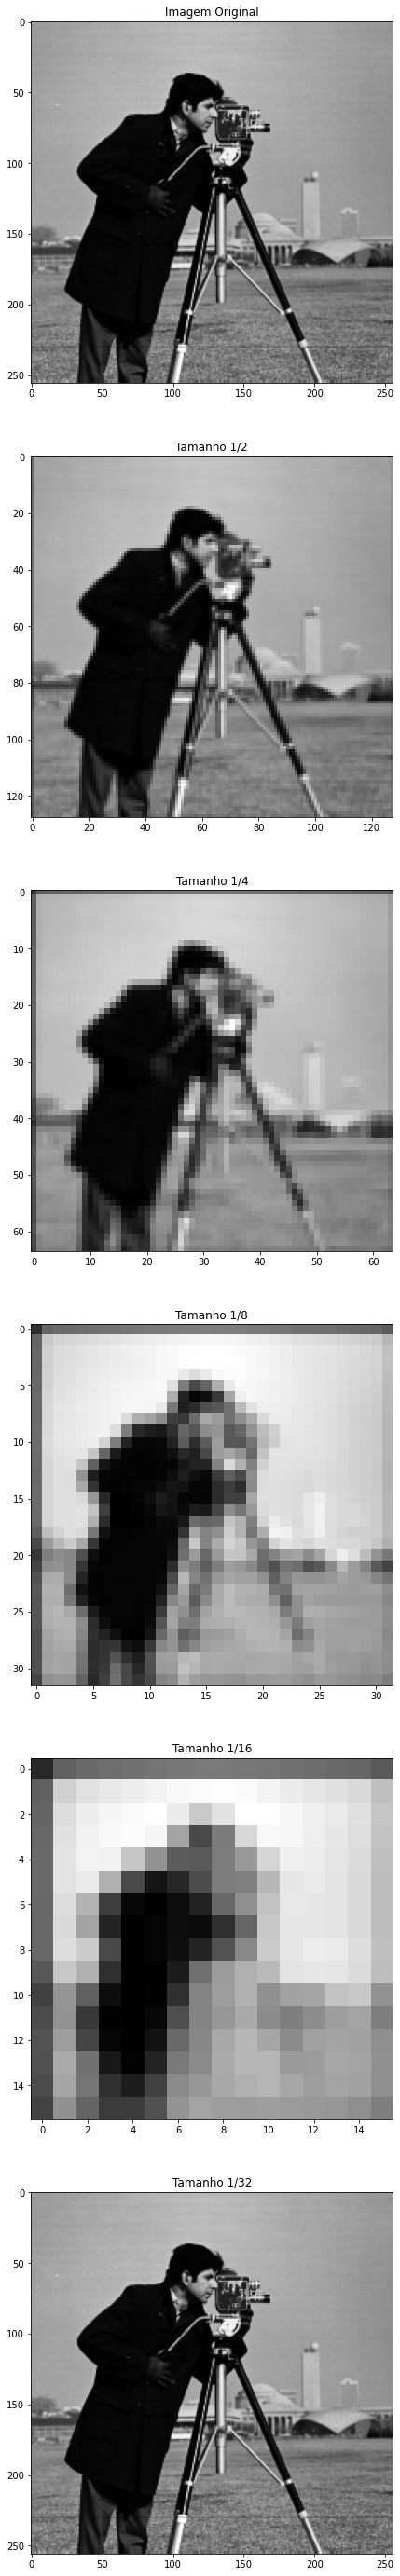

In [27]:
img = plt.imread('cameraman.tiff')

img_2x = downsample(img)
img_4x = downsample(img_2x)
img_8x = downsample(img_4x)
img_16x = downsample(img_8x)
img_32x = downsample(img_16x)

fig, ax = plt.subplots(6,1,figsize=(50,50))

ax[0].imshow(img, 'gray')
ax[0].set_title('Imagem Original')
ax[1].imshow(img_2x, 'gray')
ax[1].set_title('Tamanho 1/2')
ax[2].imshow(img_4x, 'gray')
ax[2].set_title('Tamanho 1/4')
ax[3].imshow(img_8x, 'gray')
ax[3].set_title('Tamanho 1/8')
ax[4].imshow(img_16x, 'gray')
ax[4].set_title('Tamanho 1/16')
ax[5].imshow(img, 'gray')
ax[5].set_title('Tamanho 1/32')
plt.show()

## Interpolação bicúbica

In [5]:
def upsample_2x(img, filt):

    num_rows, num_cols = img.shape
    img_upsampled = np.zeros([2*num_rows, 2*num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            img_upsampled[2*row, 2*col] = img[row, col]

    signal_interp = correlate(img_upsampled, filt, mode='same')
    
    return signal_interp

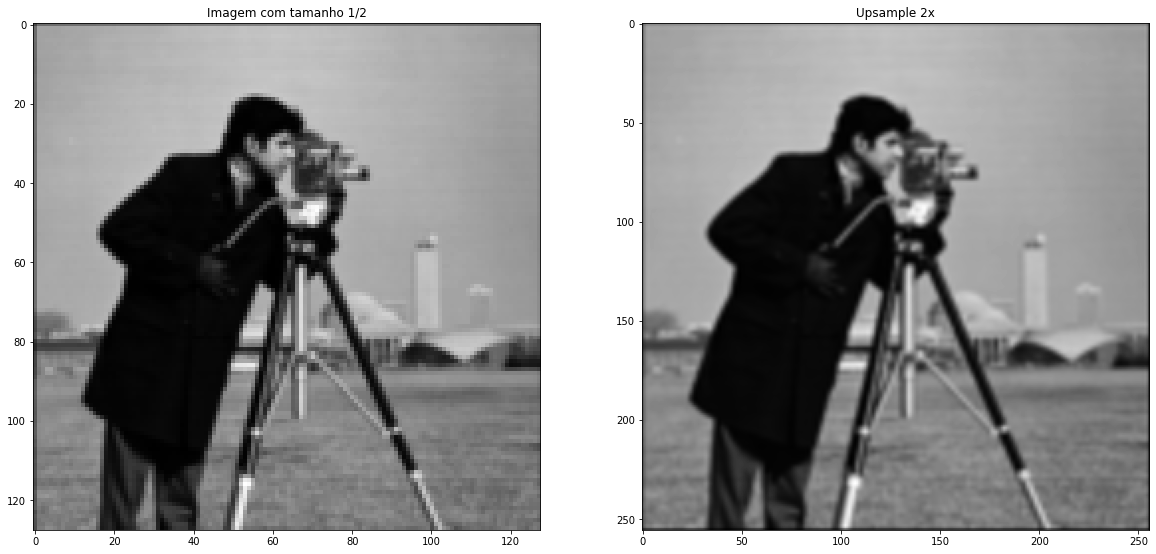

In [28]:
w_c = np.array([[-0.0625, 0, 0.5625, 1, 0.5625, 0, -0.0625]])
w_c2d = np.dot(w_c.T, w_c)

img_up2 = upsample_2x(img_2x, w_c2d)

fig, ax = plt.subplots(1,2,figsize=(20,20))

ax[0].imshow(img_2x, 'gray')
ax[0].set_title('Imagem com tamanho 1/2')
ax[1].imshow(img_up2, 'gray')
ax[1].set_title('Upsample 2x')
plt.show()

## Subtraindo as imagens

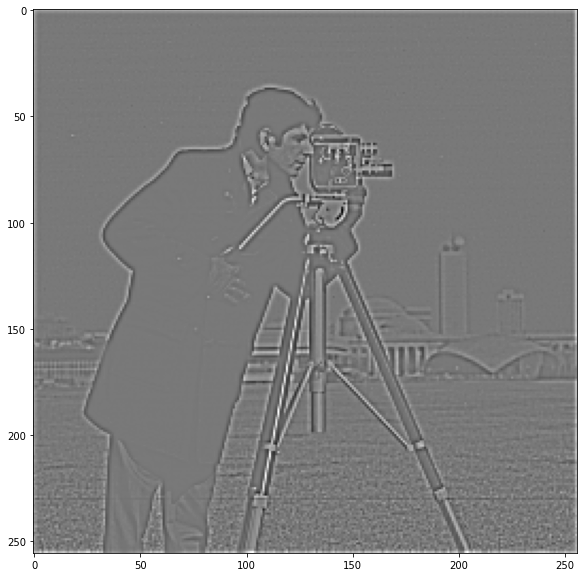

In [29]:
img3 = img - img_up2

plt.figure(figsize=(10,10))
plt.imshow(img3, 'gray')
plt.show()


## Retornando a imagem original

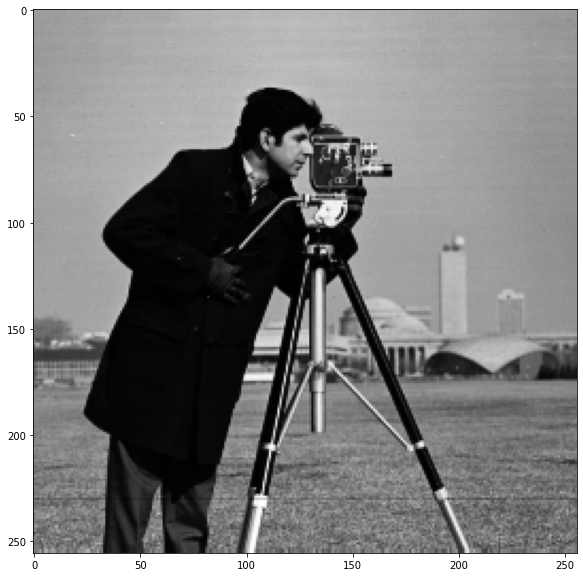

In [8]:
img4 = img_up2 + img3

plt.figure(figsize=(10,10))
plt.imshow(img4, 'gray')
plt.show()

## Pirâmide Laplaciana

Contruída com as diferenças entre as imagens originais e as interpoladas

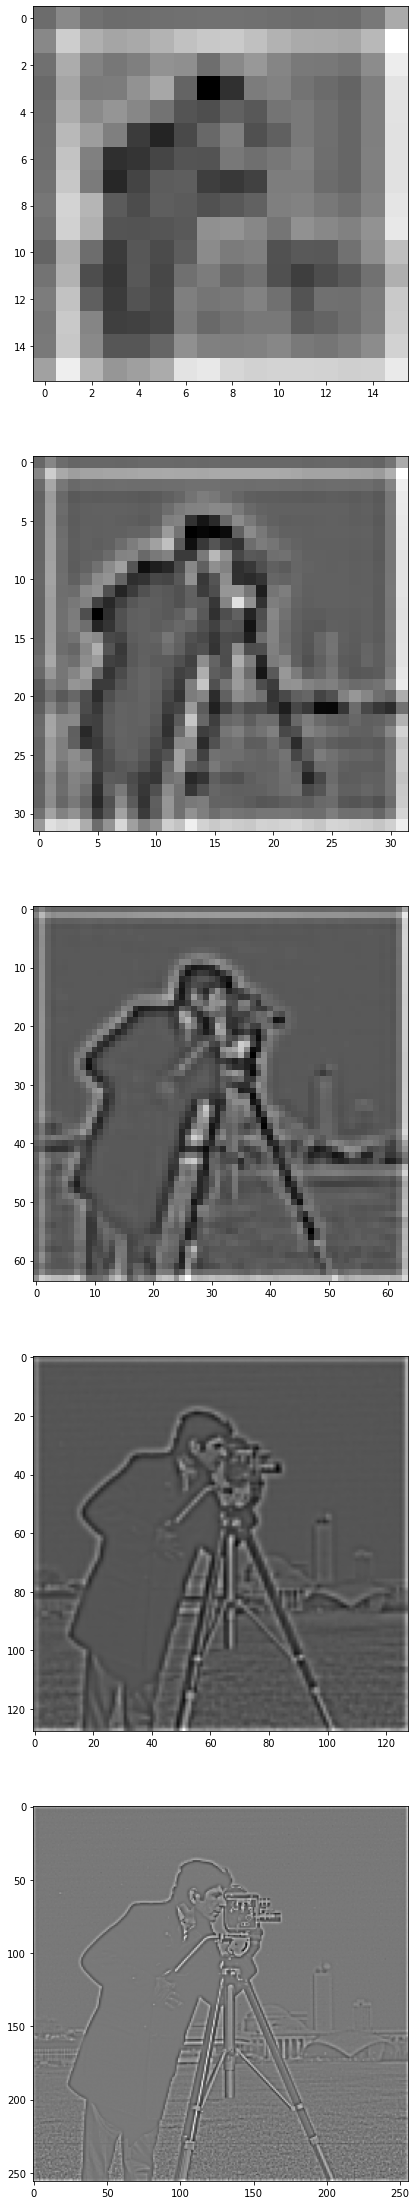

In [33]:
img_up1 = upsample_2x(img_2x, w_c2d)
img_diff1 = img - img_up1
img_up2 = upsample_2x(img_4x, w_c2d)
img_diff2 = img_2x - img_up2
img_up3 = upsample_2x(img_8x, w_c2d)
img_diff3 = img_4x - img_up3
img_up4 = upsample_2x(img_16x, w_c2d)
img_diff4 = img_8x - img_up4
img_up5 = upsample_2x(img_32x, w_c2d)
img_diff5 = img_16x - img_up5

fig, ax = plt.subplots(5,1,figsize=(40,40))

ax[0].imshow(img_diff5, 'gray')
ax[1].imshow(img_diff4, 'gray')
ax[2].imshow(img_diff3, 'gray')
ax[3].imshow(img_diff2, 'gray')
ax[4].imshow(img_diff1, 'gray')
plt.show()

## Reconstruindo

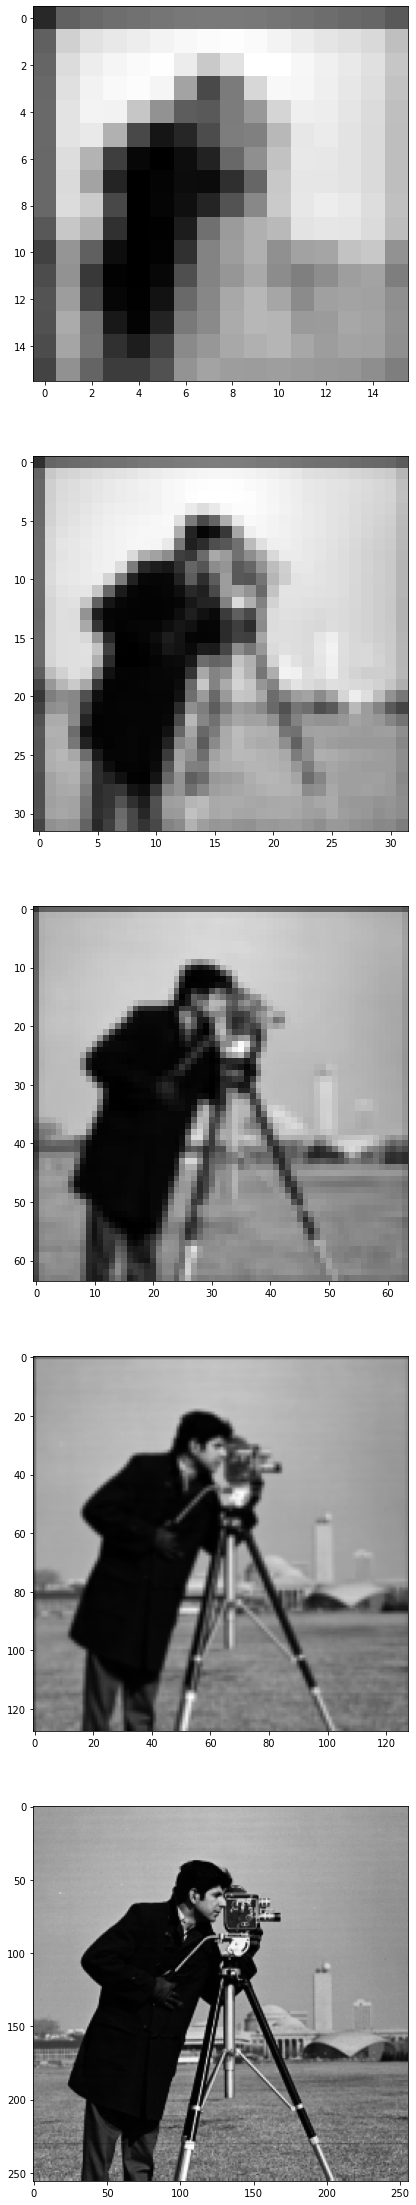

In [32]:
#topo da pirâmide gaussinana
img_r5 = img_16x

#reconstruindo com a pirâmide laplaciana
img_aux = upsample_2x(img_r5, w_c2d)
img_r4 = img_aux + img_diff4

img_aux = upsample_2x(img_r4, w_c2d)
img_r3 = img_aux + img_diff3

img_aux = upsample_2x(img_r3, w_c2d)
img_r2 = img_aux + img_diff2

img_aux = upsample_2x(img_r2, w_c2d)
img_r1 = img_aux + img_diff1


fig, ax = plt.subplots(5,1,figsize=(40,40))

ax[0].imshow(img_r5, 'gray')
ax[1].imshow(img_r4, 'gray')
ax[2].imshow(img_r3, 'gray')
ax[3].imshow(img_r2, 'gray')
ax[4].imshow(img_r1, 'gray')
plt.show()

## Apagando alguns níveis e reconstruindo

apagando os níveis `img_up4` e `img_up2`

In [11]:
img_black4 = np.zeros((img_up4.shape))
img_black2 = np.zeros((img_up2.shape))

Reconstruindo a pirâmide com as imagens apagadas

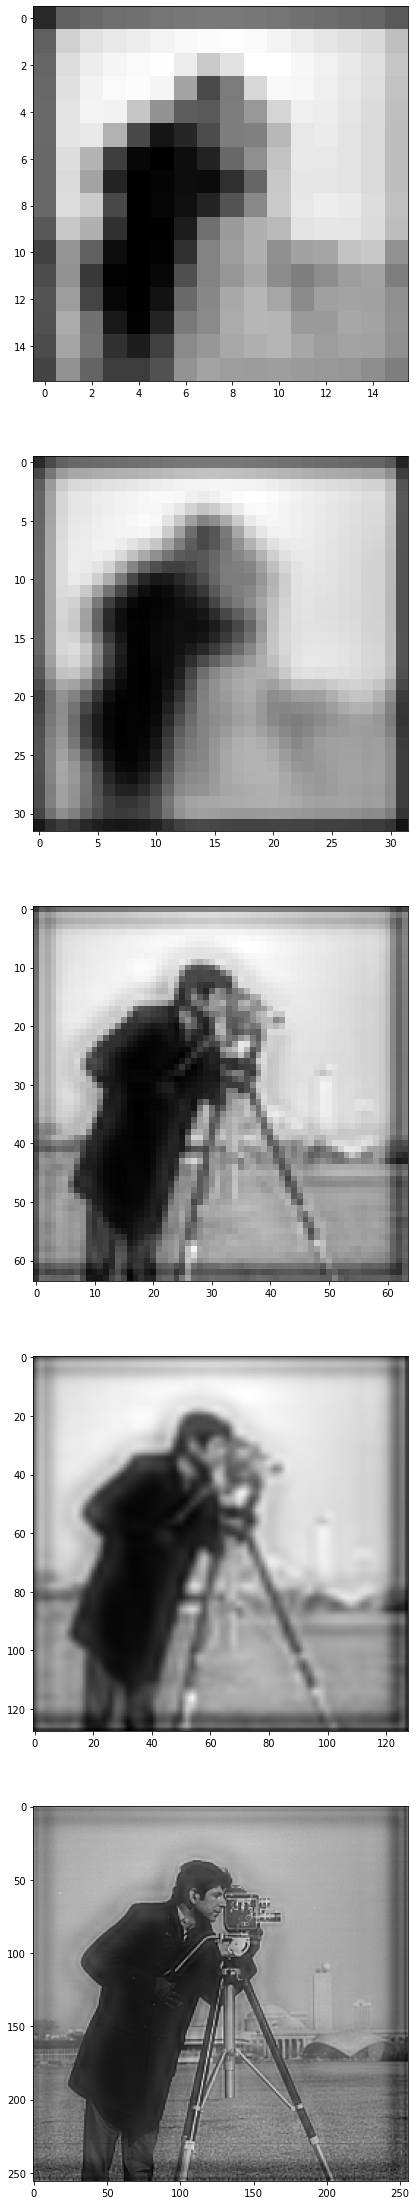

In [34]:
#topo da pirâmide gaussinana
img_b5 = img_16x

#reconstruindo com a pirâmide laplaciana apagando as imagens 4 e 2
img_aux = upsample_2x(img_b5, w_c2d)
img_b4 = img_aux + img_black4

img_aux = upsample_2x(img_b4, w_c2d)
img_b3 = img_aux + img_diff3

img_aux = upsample_2x(img_b3, w_c2d)
img_b2 = img_aux + img_black2

img_aux = upsample_2x(img_b2, w_c2d)
img_b1 = img_aux + img_diff1


fig, ax = plt.subplots(5,1,figsize=(40,40))

ax[0].imshow(img_b5, 'gray')
ax[1].imshow(img_b4, 'gray')
ax[2].imshow(img_b3, 'gray')
ax[3].imshow(img_b2, 'gray')
ax[4].imshow(img_b1, 'gray')
plt.show()

## Misturando duas imagens